# Zomato Project

## Problem Statement
 Despite the availability of rich data on platforms like Zomato, meaningful insights into restaurant performance, customer preferences, and regional service trends remain largely unexplored. Without structured analysis, businesses lack the ability to make data-driven decisions that could enhance customer experience, optimize services, and support strategic growth in the food-tech industry.

## Description
Conducted exploratory data analysis on the Zomato dataset combined with country codes to identify global trends in restaurant distribution, cuisine preferences, pricing strategies, and customer ratings across various regions.

## Import Libraries

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

## Import Zomato csv file

In [118]:
from google.colab import files

uploaded = files.upload()
restaurants=pd.read_csv('zomato.csv',encoding = "ISO-8859-1")


Saving zomato.csv to zomato (2).csv


## Import Country-Code csv file

In [119]:
from google.colab import files

uploaded = files.upload()
countrycode=pd.read_excel('Country-Code.xlsx')

Saving Country-Code.xlsx to Country-Code (2).xlsx


## Data Understanding

In [120]:
restaurants.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [121]:
restaurants.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [122]:
countrycode

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


## Data Cleaning

The average cost for two column has some 0 values which is improper. Lets try removing those datas


In [123]:
restaurants['Average Cost for two']=restaurants['Average Cost for two'].replace(0,np.nan)

In [124]:
restaurants.dropna(inplace=True)

## Merging the country sheet and zomato file to get the country code

In [125]:
restaurants=restaurants.merge(countrycode,on='Country Code')

In [126]:
restaurants.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9522,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9523,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9524,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9525,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9526,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


In [127]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9527 non-null   int64  
 1   Restaurant Name       9527 non-null   object 
 2   Country Code          9527 non-null   int64  
 3   City                  9527 non-null   object 
 4   Address               9527 non-null   object 
 5   Locality              9527 non-null   object 
 6   Locality Verbose      9527 non-null   object 
 7   Longitude             9527 non-null   float64
 8   Latitude              9527 non-null   float64
 9   Cuisines              9527 non-null   object 
 10  Average Cost for two  9527 non-null   float64
 11  Currency              9527 non-null   object 
 12  Has Table booking     9527 non-null   object 
 13  Has Online delivery   9527 non-null   object 
 14  Is delivering now     9527 non-null   object 
 15  Switch to order menu 

In [128]:
restaurants.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.527000e+03,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000,9527.000000
mean,9.037174e+06,18.070851,64.377795,25.844926,1202.216018,1.806235,2.663399,156.876037
std,8.793339e+06,56.274882,41.019775,11.006678,16141.366959,0.905712,1.516986,430.531019
min,5.300000e+01,1.000000,-157.948486,-41.330428,7.000000,1.000000,0.000000,0.000000
25%,3.019155e+05,1.000000,77.081690,28.478834,250.000000,1.000000,2.500000,5.000000
50%,6.001757e+06,1.000000,77.192035,28.570444,400.000000,2.000000,3.200000,30.000000
75%,1.835267e+07,1.000000,77.281958,28.642663,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [129]:
restaurants.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


# EDA

## Lets list all the country now and do analysis on each one

In [130]:
indiaRes=restaurants[restaurants['Country']=='India']
singaporeRes=restaurants[restaurants['Country']=='Singapore']
AusRes=restaurants[restaurants['Country']=='Australia']
BrazRes=restaurants[restaurants['Country']=='Brazil']
CanadaRes=restaurants[restaurants['Country']=='Canada']
UAERes=restaurants[restaurants['Country']=='UAE']
UKRes=restaurants[restaurants['Country']=='United Kingdom']
USRes=restaurants[restaurants['Country']=='United States']

## Get the Top rated Restaurants in each city in India

In [131]:
indiaRes.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
609,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
610,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
611,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India
612,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,India
613,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India


## Get the Cities in India
### Get the top Restaurants in each city(On the basis of rating and votes)



In [132]:
indiaRes.City.value_counts()

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
Guwahati,21
Lucknow,21
Bhubaneshwar,21
Ahmedabad,21


### Top restaurant in delhi based on the rating and vote count

In [133]:
DelhiTopRes=indiaRes[(indiaRes['City']=='New Delhi')&(indiaRes['Aggregate rating']>4.5)][['Aggregate rating','Restaurant Name','Votes']].sort_values(ascending=False,by='Votes')

In [134]:
DelhiTopRes.style.apply(lambda x: ['background: green' if x.name == 'Votes' else 'background: lightsteelblue' for i in x])

,Aggregate rating,Restaurant Name,Votes
2991,4.900000,Naturals Ice Cream,2620
3579,4.900000,Indian Accent - The Manor,1934
6637,4.600000,The California Boulevard,1691
4617,4.600000,Big Chill,1569
6975,4.700000,Echoes Satyaniketan,1563
7827,4.600000,Cafeteria & Co.,1136
3288,4.600000,Spezia Bistro,1071
6635,4.700000,Naturals Ice Cream,474
4276,4.900000,Masala Library,408
3710,4.600000,Tashan,304


## Finding out relationship between the rating and votes

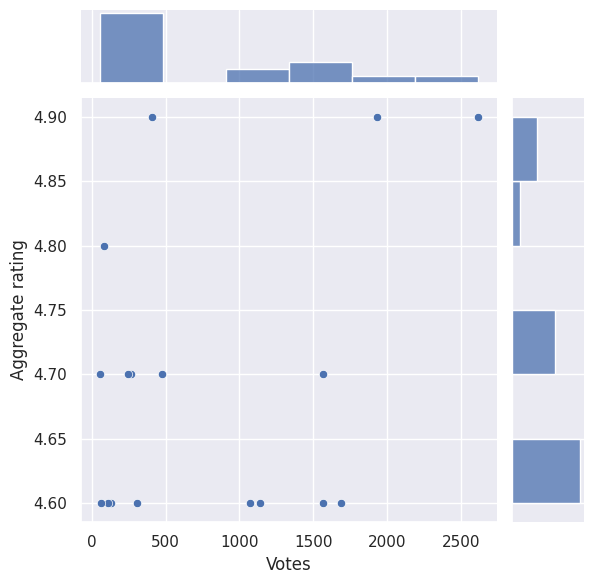

In [135]:
sns.jointplot(x='Votes', y='Aggregate rating', data=DelhiTopRes)

There is a bit linear relationship between rating and the votes although not much, voting influences the rating.

## No. of Restaurants in each Country

In [136]:
India=indiaRes['Restaurant Name'].nunique()
India

6595

## Top 5 Restaurants with Online Delivery

In [137]:
DelhiTopResOnline=indiaRes[(indiaRes['City']=='New Delhi')&(indiaRes['Aggregate rating']>4.5) &(indiaRes['Has Online delivery']=='Yes')][['Aggregate rating','Restaurant Name','Votes','Has Online delivery']].sort_values(ascending=False,by='Votes')

In [138]:
DelhiTopResOnline.style.apply(lambda x: ['background: green' if x.name == 'Has Online delivery' else 'background: Royalblue' for i in x])

,Aggregate rating,Restaurant Name,Votes,Has Online delivery
2991,4.900000,Naturals Ice Cream,2620,Yes
3288,4.600000,Spezia Bistro,1071,Yes
6635,4.700000,Naturals Ice Cream,474,Yes
2992,4.700000,Zabardast Indian Kitchen,242,Yes
7158,4.600000,Greenr Cafe,112,Yes
6404,4.600000,Food Scouts,61,Yes


## Cheap but Best Restaurants available in a City

**Lets check which country is providing most online delivery option**

<Axes: xlabel='Country', ylabel='count'>

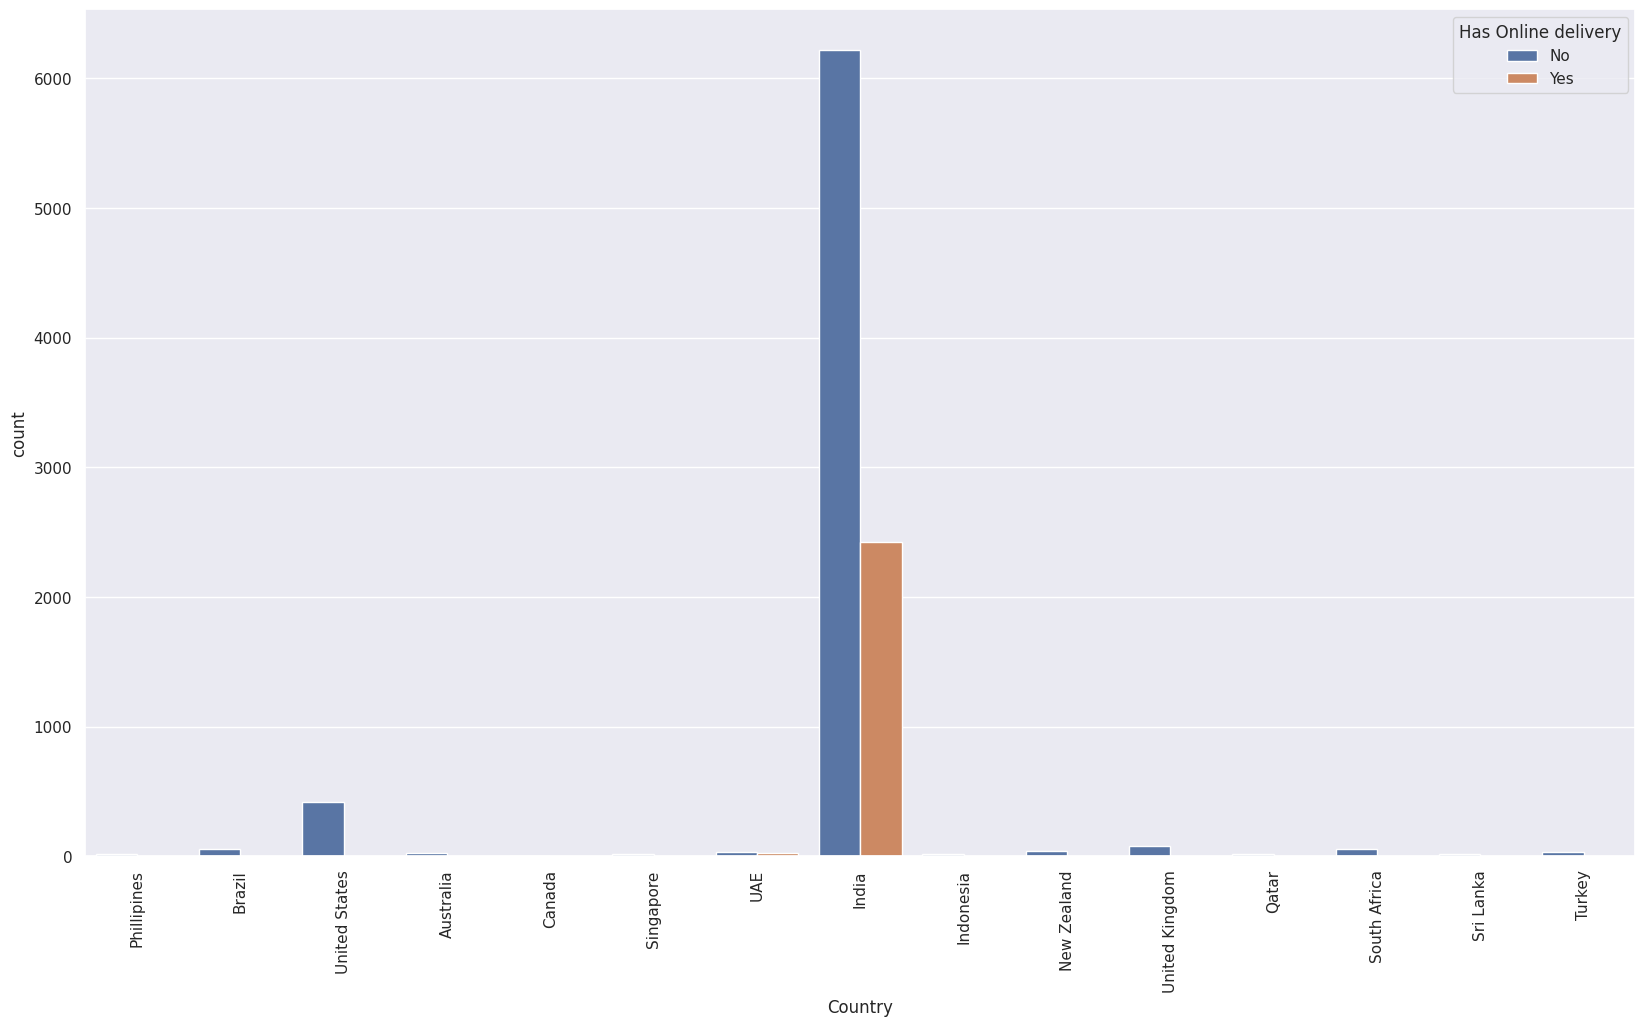

In [139]:
sns.set(rc={'figure.figsize':(20,11)})
plt.xticks(rotation = 90)
sns.countplot(x='Country', hue='Has Online delivery', data=restaurants)

**Lets get down and hunt for the cheap but best restaurants available in a city**

In [140]:
Chennai=indiaRes[(indiaRes['City']=='Chennai')&(indiaRes['Aggregate rating']>4.5)&(indiaRes['Votes']>500)][['Average Cost for two','Restaurant Name','Aggregate rating','Votes']].sort_values(ascending=True,by=['Average Cost for two']).head()

In [141]:
Chennai.style.apply(lambda x: ['background: darkorange' if x.name == 'Average Cost for two' else 'background: lightsteelblue' for i in x])

,Average Cost for two,Restaurant Name,Aggregate rating,Votes
792,350.000000,Fusilli Reasons,4.600000,1510
795,1200.000000,Bombay Brasserie,4.600000,1753
804,1400.000000,Coal Barbecues,4.600000,1267
803,1600.000000,AB's - Absolute Barbecues,4.900000,859
790,1700.000000,Chili's,4.800000,1262


## Top Cuisines in each Region.

In [142]:
IndianCuisines=restaurants[restaurants['Country']=='India']['Cuisines'].value_counts().head()

## Aggregate Rating of all the Restaurants in each city in a Country

In [143]:
table=pd.pivot_table(data=restaurants, index = ('Country', 'City'), values="Aggregate rating")

In [144]:
cm = sns.light_palette("green", as_cmap=True)
table.style.background_gradient(cmap=cm,axis=0)

Calculating the restaurants rating based on the rating text with percentage

In [145]:
RestaurantratingEachCountry=pd.pivot_table(data=restaurants, index = ('Country', 'Rating text'), values=("Restaurant ID"),aggfunc="count")

In [146]:
RestaurantGroup=restaurants.groupby(by="Country")['Restaurant ID'].count()
RestaurantGroup.columns=['No of restaurants']

In [147]:
TotalRatingCountry=RestaurantGroup.groupby(by='Country').sum()

In [148]:
TotalRatingCountry.reset_index()

,Country,Restaurant ID
0,Australia,24
1,Brazil,60
2,Canada,4
3,India,8643
4,Indonesia,21
5,New Zealand,40
6,Phillipines,22
7,Qatar,20
8,Singapore,20
9,South Africa,60


In [149]:
FinalRestPerc=pd.merge(TotalRatingCountry.reset_index(),RestaurantratingEachCountry.reset_index(),on='Country')

In [150]:
FinalRestPerc
FinalRestPerc['Percentage']=(FinalRestPerc['Restaurant ID_y']/FinalRestPerc['Restaurant ID_x'])*100

In [151]:
FinalRestPerc

,Country,Restaurant ID_x,Rating text,Restaurant ID_y,Percentage
0,Australia,24,Average,4,16.666667
1,Australia,24,Excellent,1,4.166667
2,Australia,24,Good,13,54.166667
3,Australia,24,Poor,1,4.166667
4,Australia,24,Very Good,5,20.833333
...,...,...,...,...,...
61,United States,419,Excellent,67,15.990453
62,United States,419,Good,152,36.276850
63,United States,419,Not rated,3,0.715990
64,United States,419,Poor,2,0.477327


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'New Zealand'),
  Text(6, 0, 'Phillipines'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Singapore'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Sri Lanka'),
  Text(11, 0, 'Turkey'),
  Text(12, 0, 'UAE'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'United States')])

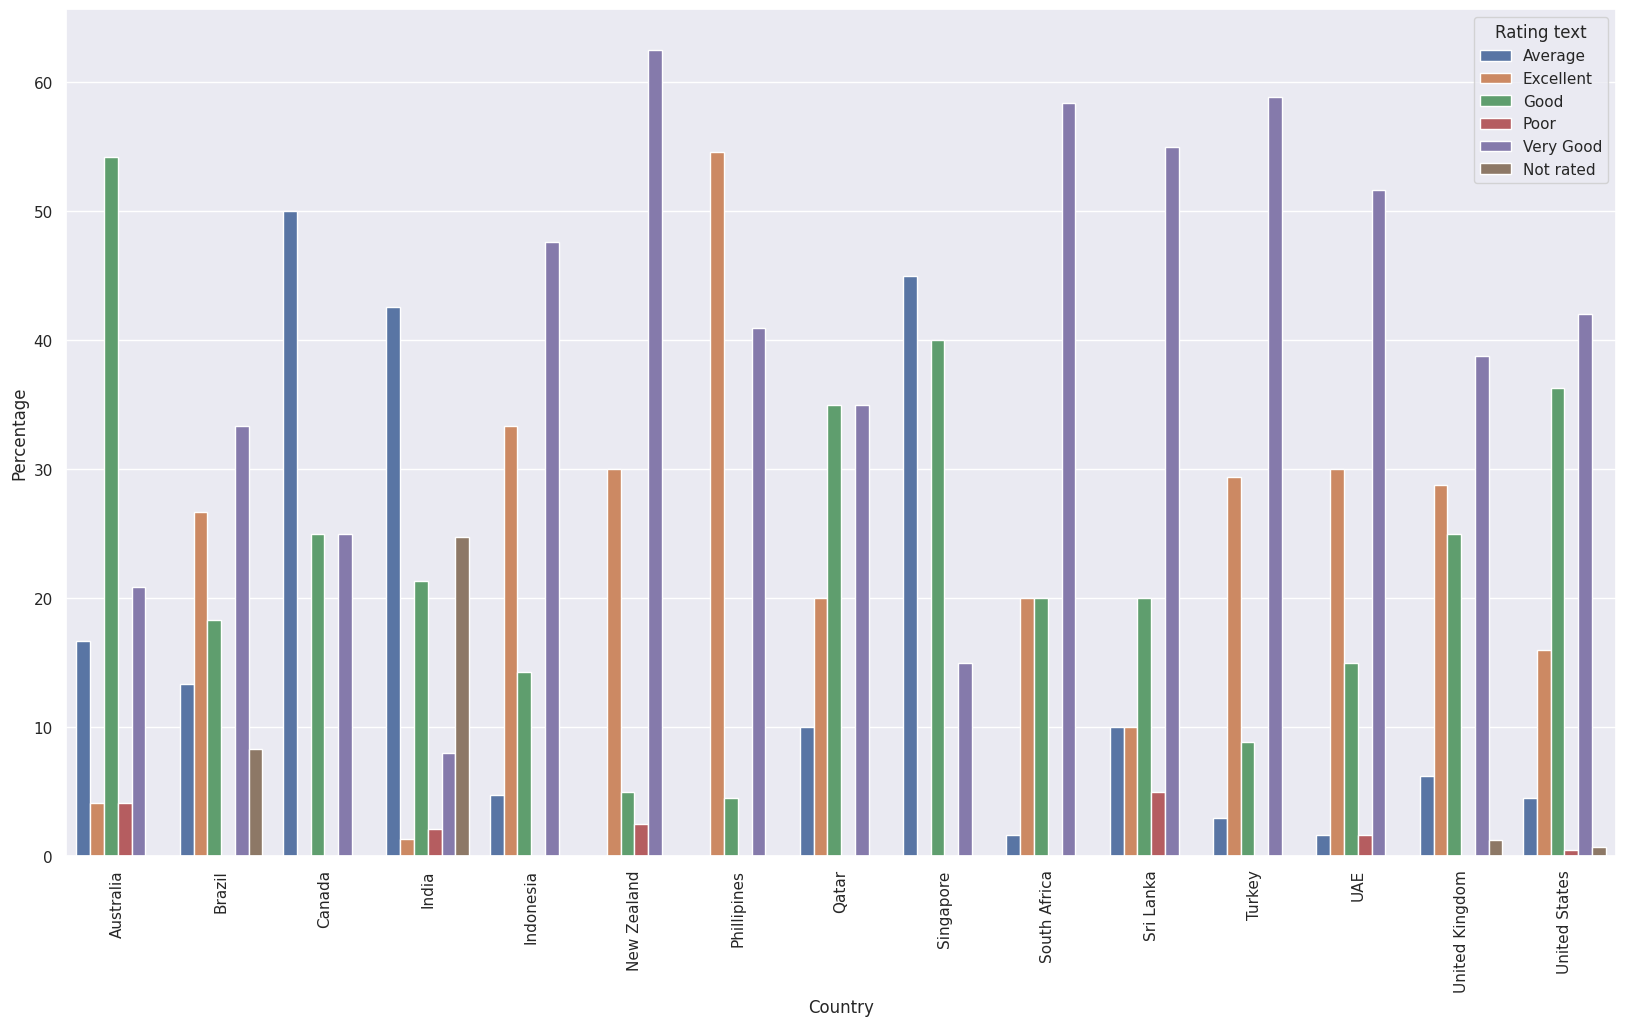

In [152]:
sns.set(rc={'figure.figsize':(20,11)})
sns.barplot(x='Country', y='Percentage', data=FinalRestPerc, hue='Rating text')
plt.xticks(rotation = 90)

**Looks like australia seem to have good restaurants with some delicious food**

## Does Rating Influences the Cost of Restaurant? (Draw Boxplot).

<Axes: ylabel='Average Cost for two'>

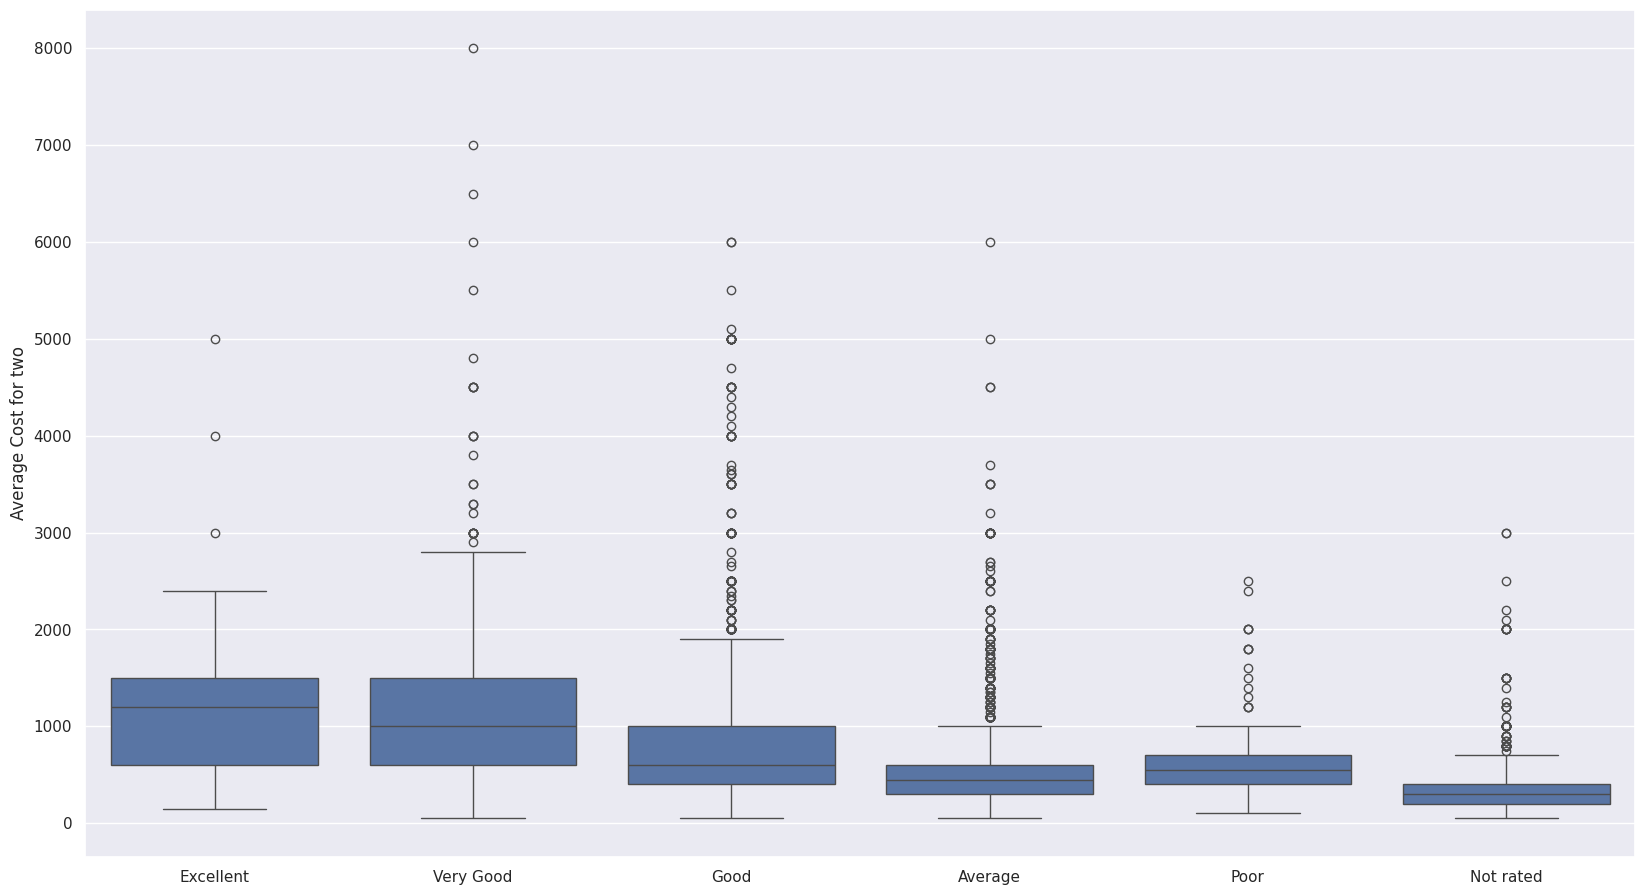

In [153]:
avgcostforindres=indiaRes['Average Cost for two']
aggratingofindres=pd.Categorical(values=indiaRes['Rating text'],categories=["Excellent", "Very Good", "Good", "Average", "Poor", "Not rated"], ordered=True)
sns.boxplot(x=aggratingofindres, y=avgcostforindres)

**The plot shows rating does influence the cost of a restaurant**

## Top Percentage cover of Restaurants in a City. (Draw Pie Graph).

<Axes: ylabel='count'>

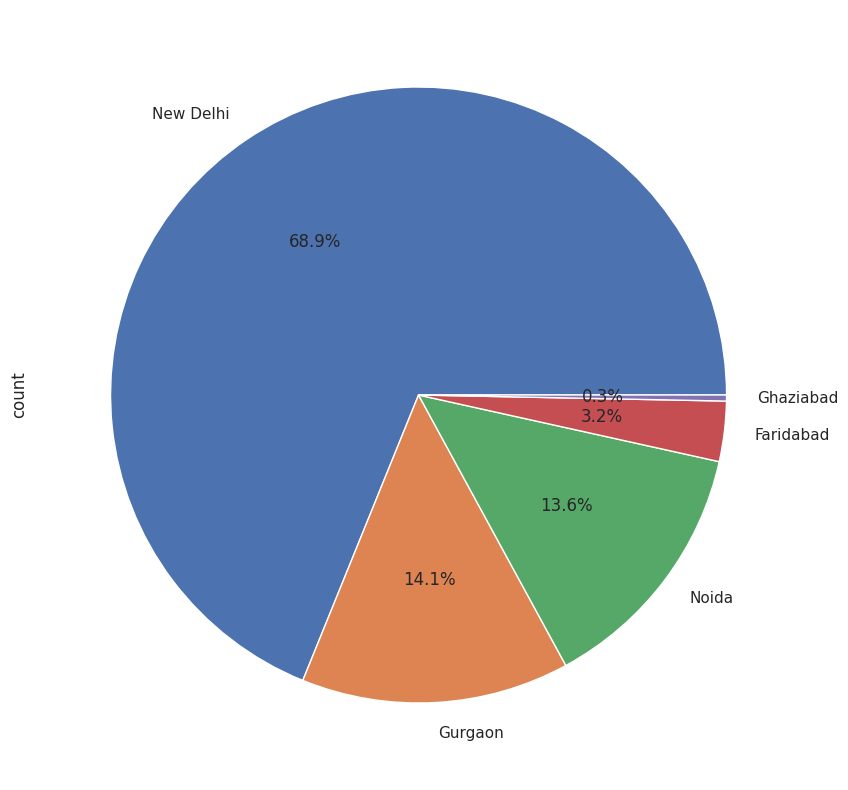

In [154]:
plt.figure(figsize=(10,10))
indiaRes['City'].value_counts().head().plot(kind='pie',autopct='%1.1f%%')

## Top Cuisines in Indian Restaurants (Draw Pie Graph).

In [155]:
booking_avail=indiaRes[(indiaRes['City']=='New Delhi')&(indiaRes['Aggregate rating']>4.5) &(indiaRes['Has Table booking']=='Yes')][['Aggregate rating','Restaurant Name','Votes','Has Table booking']].sort_values(ascending=False,by='Votes')
booking_avail.style.apply(lambda x: ['background: darkorange' if x.name == 'Has Table booking' else 'background: lightsteelblue' for i in x])

,Aggregate rating,Restaurant Name,Votes,Has Table booking
6637,4.600000,The California Boulevard,1691,Yes
3288,4.600000,Spezia Bistro,1071,Yes
3710,4.600000,Tashan,304,Yes
2992,4.700000,Zabardast Indian Kitchen,242,Yes
6633,4.600000,Band Baaja Baaraat,128,Yes


<Axes: ylabel='count'>

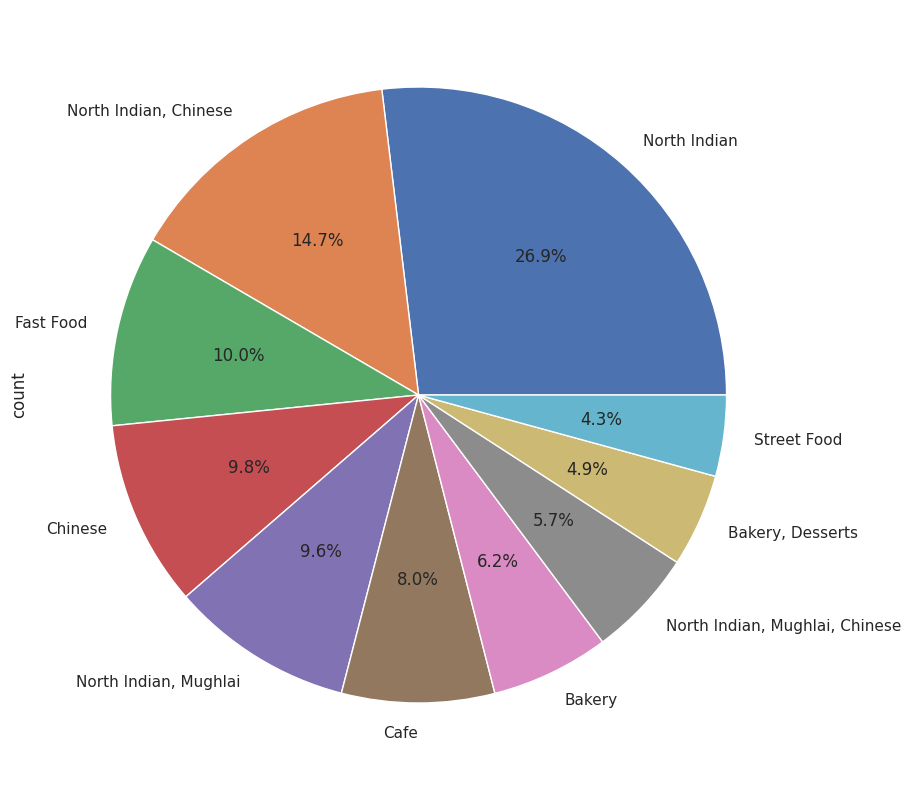

In [156]:
plt.figure(figsize=(10,10))
indiaRes['Cuisines'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')

# Conclusion

* "Naturals Ice Cream" received a perfect rating of 5, making it one of the top-rated establishments in the dataset.

* India dominates the Zomato dataset, contributing the highest number of restaurant listings, with countries like the USA, UK, and UAE trailing behind significantly.

* Countries such as Australia and the Philippines show a higher proportion of positively rated restaurants, compared to India where the average rating distribution skews lower.

* New Delhi alone accounts for the majority (~68%) of Zomato's Indian listings, followed by Gurgaon and Noida—indicating strong regional clustering.

* There is limited correlation between votes and aggregate ratings, indicating that customer popularity does not always reflect restaurant quality.

* North Indian cuisine is the most commonly available and preferred, often paired with Chinese or Fast Food, highlighting a trend toward spicy and familiar flavors.

* Several restaurants across Indian cities offer excellent value for money, with low average costs and high ratings, making them ideal choices for budget-conscious food lovers.

* While online delivery is a widely available service, not all highly-rated restaurants offer it. However, restaurants like Zolocrust maintain high ratings while supporting online orders, proving that convenience and quality can co-exist.